In [102]:
import pandas as pd

# Read the dataset
df = pd.read_csv('psc_severity_train.csv')

# Display the first few rows of the dataframe
df.head()

,PscInspectionId,deficiency_code,annotation_id,username,annotation_severity,def_text,InspectionDate,VesselId,PscAuthorityId,PortId,VesselGroup,age
0,1702496,1104,42180251,mihail,Low,PscInspectionId: 1702496\n\nDeficiency/Finding...,4/24/23,141884,7,2028,Chemical,20.813142
1,1702496,1104,42532116,marc,High,PscInspectionId: 1702496\n\nDeficiency/Finding...,4/24/23,141884,7,2028,Chemical,20.813142
2,1702496,1104,42631723,raul,High,PscInspectionId: 1702496\n\nDeficiency/Finding...,4/24/23,141884,7,2028,Chemical,20.813142
3,1795901,10135,42190695,mihail,Medium,PscInspectionId: 1795901\n\nDeficiency/Finding...,3/11/24,292540,9,1000736,Dry Bulk,11.523614
4,1795901,10135,42851742,raul,Medium,PscInspectionId: 1795901\n\nDeficiency/Finding...,3/11/24,292540,9,1000736,Dry Bulk,11.523614


## Cleaning Dataset

In [103]:
# Remove rows with NA values
df_cleaned = df.dropna()

# Display the first few rows of the cleaned dataframe
df_cleaned.head()

,PscInspectionId,deficiency_code,annotation_id,username,annotation_severity,def_text,InspectionDate,VesselId,PscAuthorityId,PortId,VesselGroup,age
0,1702496,1104,42180251,mihail,Low,PscInspectionId: 1702496\n\nDeficiency/Finding...,4/24/23,141884,7,2028,Chemical,20.813142
1,1702496,1104,42532116,marc,High,PscInspectionId: 1702496\n\nDeficiency/Finding...,4/24/23,141884,7,2028,Chemical,20.813142
2,1702496,1104,42631723,raul,High,PscInspectionId: 1702496\n\nDeficiency/Finding...,4/24/23,141884,7,2028,Chemical,20.813142
3,1795901,10135,42190695,mihail,Medium,PscInspectionId: 1795901\n\nDeficiency/Finding...,3/11/24,292540,9,1000736,Dry Bulk,11.523614
4,1795901,10135,42851742,raul,Medium,PscInspectionId: 1795901\n\nDeficiency/Finding...,3/11/24,292540,9,1000736,Dry Bulk,11.523614


Total rows: 17970
Counts of annotation severities:
annotation_severity
Medium              6919
Low                 6859
High                4042
Not a deficiency     150
Name: count, dtype: int64


<Axes: title={'center': 'Counts of Annotation Severities'}, xlabel='annotation_severity'>

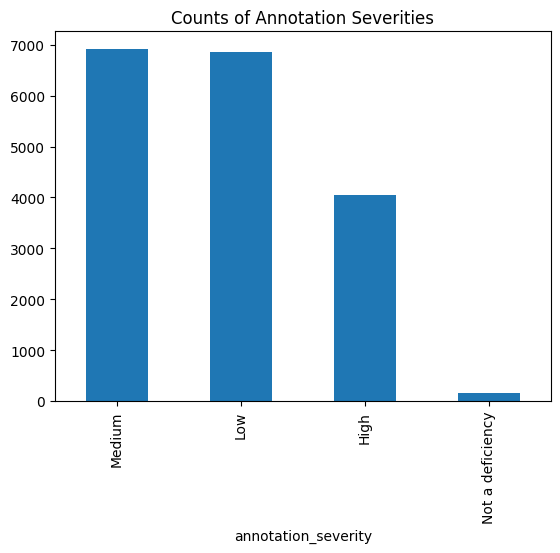

In [104]:
# Summary of the number of rows
total_rows = df_cleaned.shape[0]

# Count of each annotation severity
severity_counts = df_cleaned['annotation_severity'].value_counts()

# Display the summary
print(f"Total rows: {total_rows}")
print("Counts of annotation severities:")
print(severity_counts)

# Plot the counts of annotation severities
severity_counts.plot(kind='bar', title='Counts of Annotation Severities')

## Factor the annotation_severity variable


In [105]:
df_cleaned['annotation_severity'] = pd.Categorical(df_cleaned['annotation_severity'])

# Display the first few rows to verify the changes
df_cleaned.head()

/var/folders/yj/_sykjyks31j7t9pdm3jfl0v00000gn/T/ipykernel_94607/390185121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['annotation_severity'] = pd.Categorical(df_cleaned['annotation_severity'])


,PscInspectionId,deficiency_code,annotation_id,username,annotation_severity,def_text,InspectionDate,VesselId,PscAuthorityId,PortId,VesselGroup,age
0,1702496,1104,42180251,mihail,Low,PscInspectionId: 1702496\n\nDeficiency/Finding...,4/24/23,141884,7,2028,Chemical,20.813142
1,1702496,1104,42532116,marc,High,PscInspectionId: 1702496\n\nDeficiency/Finding...,4/24/23,141884,7,2028,Chemical,20.813142
2,1702496,1104,42631723,raul,High,PscInspectionId: 1702496\n\nDeficiency/Finding...,4/24/23,141884,7,2028,Chemical,20.813142
3,1795901,10135,42190695,mihail,Medium,PscInspectionId: 1795901\n\nDeficiency/Finding...,3/11/24,292540,9,1000736,Dry Bulk,11.523614
4,1795901,10135,42851742,raul,Medium,PscInspectionId: 1795901\n\nDeficiency/Finding...,3/11/24,292540,9,1000736,Dry Bulk,11.523614


In [106]:
# Map annotation_severity categories to numerical values
severity_mapping = {
    "Not a deficiency": 0,
    "Low": 1,
    "Medium": 2,
    "High": 3
}

# Create a new numerical variable for annotation_severity
df_cleaned['severity_numeric'] = df_cleaned['annotation_severity'].map(severity_mapping)

# Verify the mapping
df_cleaned[['annotation_severity', 'severity_numeric']].drop_duplicates()


/var/folders/yj/_sykjyks31j7t9pdm3jfl0v00000gn/T/ipykernel_94607/4135548200.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['severity_numeric'] = df_cleaned['annotation_severity'].map(severity_mapping)


,annotation_severity,severity_numeric
0,Low,1
1,High,3
3,Medium,2
13235,Not a deficiency,0


## Voting System to establish a consensus severity among different officers


In [107]:
# Group by PscInspectionId and get all severities for each inspection
severity_votes = df_cleaned.groupby('PscInspectionId')['annotation_severity'].apply(list)

def get_voted_severity_with_mean(severities):
    # Count occurrences of each severity
    severity_counts = pd.Series(severities).value_counts()
    
    # If there's a clear majority, return it
    if severity_counts.iloc[0] > len(severities)/2:
        return severity_counts.index[0]
    
    # Convert severities to numeric values for mean calculation
    numeric_severities = pd.Series(severities).map(severity_mapping)
    mean_severity = numeric_severities.mean()
    
    # Map mean value back to severity level
    if mean_severity <= 1.5:
        return "Low"
    elif mean_severity >= 2.5:
        return "High"
    else:
        return "Medium"

#Apply voting system and create new column
df_cleaned['voted_severity_mean'] = df_cleaned.groupby('PscInspectionId')['annotation_severity'].transform(
    lambda x: get_voted_severity_with_mean(list(x))
)

# Display sample results to verify
print(df_cleaned.groupby('PscInspectionId')[['annotation_severity', 'voted_severity_mean']].head(10))

# Count occurrences of each severity level in voted_severity_mean
everity_counts = df_cleaned['voted_severity_mean'].value_counts()

# Display the counts
print(severity_counts)



      annotation_severity voted_severity_mean
0                     Low              Medium
1                    High              Medium
2                    High              Medium
3                  Medium                High
4                  Medium                High
...                   ...                 ...
17983              Medium              Medium
17984                 Low              Medium
17988              Medium              Medium
17989                 Low              Medium
17990              Medium              Medium

[16589 rows x 2 columns]
annotation_severity
Medium              6919
Low                 6859
High                4042
Not a deficiency     150
Name: count, dtype: int64


/var/folders/yj/_sykjyks31j7t9pdm3jfl0v00000gn/T/ipykernel_94607/1473945921.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['voted_severity_mean'] = df_cleaned.groupby('PscInspectionId')['annotation_severity'].transform(


## Create numeric variable for severity

In [108]:
# Create mapping for voted_severity_mean
voted_severity_mean_mapping = {
    "Not a deficiency": 0,
    "Low": 1,
    "Medium": 2,
    "High": 3
}

# Create new numeric column
df_cleaned['severity_numeric'] = df_cleaned['voted_severity_mean'].map(voted_severity_mean_mapping)

# Verify the mapping worked correctly
print(df_cleaned[['voted_severity_mean', 'severity_numeric']].drop_duplicates())

# Display value counts to verify distribution
print("\nDistribution of encoded values:")
print(df_cleaned['severity_numeric'].value_counts())

      voted_severity_mean  severity_numeric
0                  Medium                 2
3                    High                 3
12                    Low                 1
13290    Not a deficiency                 0

Distribution of encoded values:
severity_numeric
2    9750
1    5859
3    2340
0      21
Name: count, dtype: int64


/var/folders/yj/_sykjyks31j7t9pdm3jfl0v00000gn/T/ipykernel_94607/391425943.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['severity_numeric'] = df_cleaned['voted_severity_mean'].map(voted_severity_mean_mapping)


## Rebalance dataset due to imbalance in values of severity

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from collections import Counter

# Get X (features) and y (target)
X = df_cleaned['def_text'].fillna("")  # Text feature
y = df_cleaned['severity_numeric']  # Target variable

# First, transform text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_balanced, y_balanced = smote.fit_resample(X_tfidf, y)

# Print class distribution before and after balancing
print("Original class distribution:", Counter(y))
print("Balanced class distribution:", Counter(y_balanced))

# Store the balanced data for later use
df_cleaned_balanced = pd.DataFrame(X_balanced.toarray(), columns=vectorizer.get_feature_names_out())
df_cleaned_balanced['severity_numeric'] = y_balanced

Original class distribution: Counter({2: 9750, 1: 5859, 3: 2340, 0: 21})
Balanced class distribution: Counter({2: 9750, 3: 9750, 1: 9750, 0: 9750})


## Training model using RandomForest

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define the feature and target
X = df_cleaned['def_text'].fillna("")  # Text feature
y = df_cleaned['severity_numeric']  # Target variable

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=1, stratify=y)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy,report


(0.9919309961046188,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         4\n           1       0.99      0.99      0.99      1172\n           2       0.99      1.00      0.99      1950\n           3       1.00      0.99      0.99       468\n\n    accuracy                           0.99      3594\n   macro avg       1.00      0.99      0.99      3594\nweighted avg       0.99      0.99      0.99      3594\n')

## With over 95% accuracy, we showing most important features of model

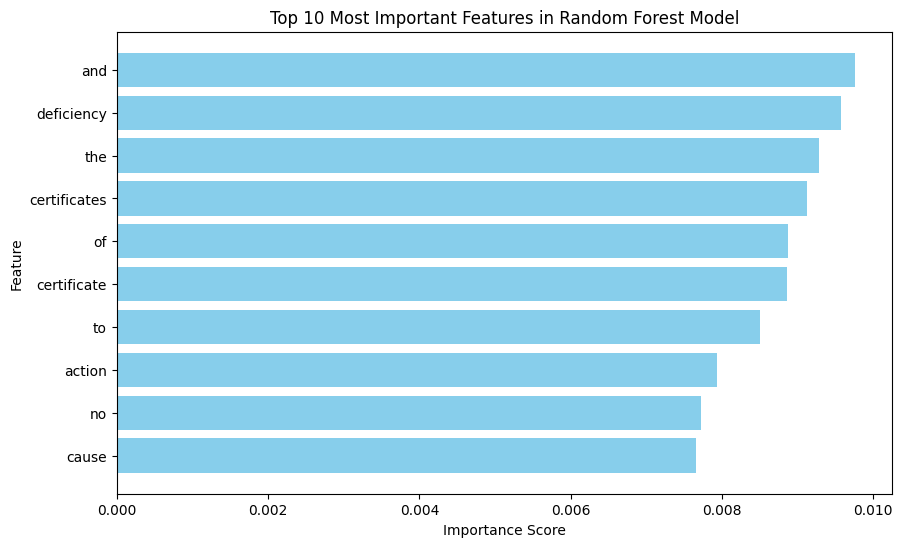

,Feature,Importance
27,and,0.009756
120,deficiency,0.009574
451,the,0.009277
73,certificates,0.009121
285,of,0.008878
72,certificate,0.008863
461,to,0.008502
14,action,0.007939
277,no,0.007725
70,cause,0.007660


In [111]:
import matplotlib.pyplot as plt

# Extract feature importance from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Get the feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Combine feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
top_features = feature_importance_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

feature_importance_df.head(10)  # Display the top 10 features with their importance scores


## Because Features had common english words, we removed it to make sure only keywords are used as predictors

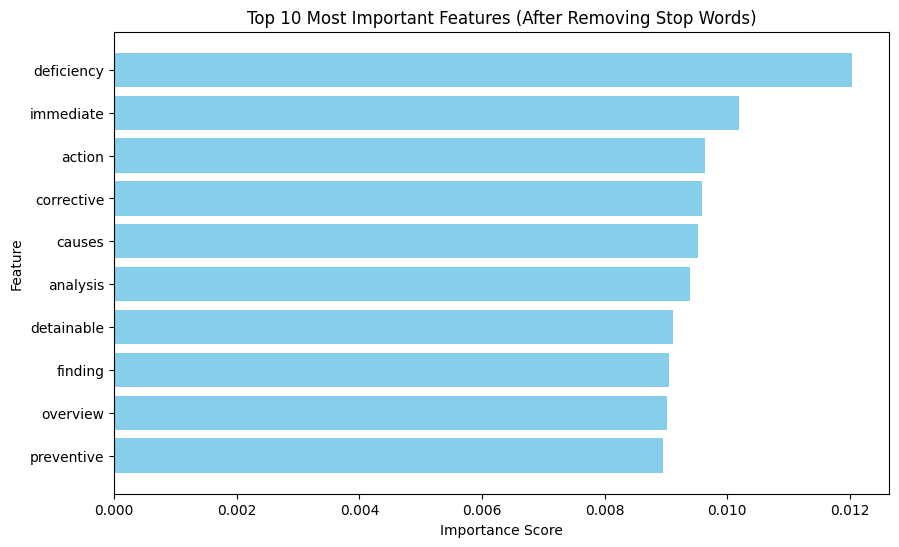

In [112]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# Combine English stop words with custom stop words

custom_stop_words = [
    'unknown', 'root', 'cause', 'certificate', 
    'certificates', 'certificated', 'certification', 'certified'
]

combined_stop_words = ENGLISH_STOP_WORDS.union(custom_stop_words)

vectorizer = TfidfVectorizer(
    max_features=500,  # Limit the number of features
    stop_words='english'  # Use built-in English stop words
)

# Re-transform the def_text column and remove custom stop words after vectorization
X_tfidf = vectorizer.fit_transform(df_cleaned['def_text'].fillna(""))

# Filter out custom stop words from the resulting feature set
feature_names = vectorizer.get_feature_names_out()
filtered_feature_names = [word for word in feature_names if word not in custom_stop_words]

# Recreate the TF-IDF matrix with the filtered features
filtered_X_tfidf = X_tfidf[:, [feature_names.tolist().index(word) for word in filtered_feature_names]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    filtered_X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Re-train the Random Forest model with the filtered data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the updated model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Extract the updated feature importance
feature_importances = rf_model.feature_importances_

# Combine feature names and their importance scores
final_feature_importance_df = pd.DataFrame({
    'Feature': filtered_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features after final refinement
top_features = final_feature_importance_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features (After Removing Stop Words)')
plt.gca().invert_yaxis()
plt.show()



## Confusion Matrix to evaluate overall accuracy of model, to see if its reliable

In [113]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create DataFrame with labeled rows and columns
cm_df = pd.DataFrame(
    cm,
    index=['True Non-Deficiency','True Low', 'True Medium', 'True High'],
    columns=['Predicted Non-Deficiency','Predicted Low', 'Predicted Medium', 'Predicted High']
)

# Display the confusion matrix as a table
print("\nConfusion Matrix:")
print(cm_df)

# Add percentage calculations
print("\nAccuracy by Class:")
for i, label in enumerate(['Non-Deficiency','Low', 'Medium', 'High']):
    correct = cm[i][i]
    total = sum(cm[i])
    percentage = (correct/total) * 100
    print(f"{label}: {correct}/{total} ({percentage:.1f}%)")


Confusion Matrix:
                     Predicted Non-Deficiency  Predicted Low  \
True Non-Deficiency                         3              1   
True Low                                    0           1153   
True Medium                                 0              0   
True High                                   0              0   

                     Predicted Medium  Predicted High  
True Non-Deficiency                 0               0  
True Low                           19               0  
True Medium                      1950               0  
True High                          12             456  

Accuracy by Class:
Non-Deficiency: 3/4 (75.0%)
Low: 1153/1172 (98.4%)
Medium: 1950/1950 (100.0%)
High: 456/468 (97.4%)


## With overlal 90% accuracy, the model is used to predict test dataset

In [114]:
# Reload the test dataset
test_data_path = 'psc_severity_test.csv'
test_data_new = pd.read_csv(test_data_path)

# Prepare the def_text column for prediction
X_test_text_new = test_data_new['def_text'].fillna("")

# Transform the test data using the trained vectorizer
X_test_tfidf_new = vectorizer.transform(X_test_text_new)

# Filter the features to match the training data
feature_names = vectorizer.get_feature_names_out()
filtered_feature_names = [word for word in feature_names if word not in custom_stop_words]
filtered_X_test_tfidf = X_test_tfidf_new[:, [feature_names.tolist().index(word) for word in filtered_feature_names]]

# Predict using the trained Random Forest model
test_predictions_new = rf_model.predict(filtered_X_test_tfidf)

# Add predictions to the test dataset
test_data_new['predicted_discrete_severity'] = test_predictions_new

# Map predicted discrete severity to annotation categories
severity_mapping_new = {0: 'Low', 1: 'Medium', 2: 'High'}
test_data_new['predicted_severity'] = test_data_new['predicted_discrete_severity'].map(severity_mapping_new)

# Display the first few rows with predictions
test_data_new[['def_text', 'predicted_discrete_severity', 'predicted_severity']].head()

,def_text,predicted_discrete_severity,predicted_severity
0,PscInspectionId: 1802364\n\nDeficiency/Finding...,2,High
1,PscInspectionId: 1736765\n\nDeficiency/Finding...,2,High
2,PscInspectionId: 1787907\n\nDeficiency/Finding...,2,High
3,PscInspectionId: 1691176\n\nDeficiency/Finding...,2,High
4,PscInspectionId: 1712454\n\nDeficiency/Finding...,2,High


Prediction Distribution:
Medium: 860
Low: 239
High: 2


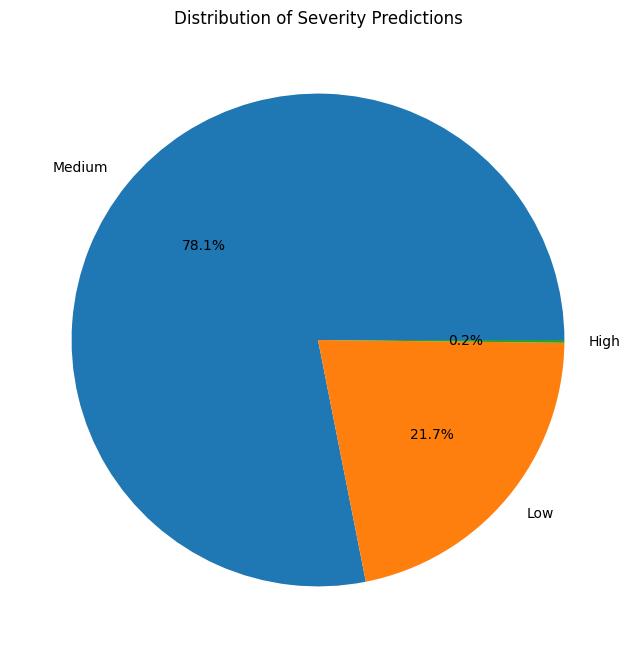


Percentage Distribution:
Medium: 78.1%
Low: 21.7%
High: 0.2%


In [115]:
# Update severity_mapping_new to include all possible severity levels
severity_mapping_new = {0: 'Not a Discrepancy', 1: 'Low', 2: 'Medium', 3: 'High'}

# Get prediction counts
prediction_counts = test_data_new['predicted_discrete_severity'].value_counts()

print("Prediction Distribution:")
for severity_level, count in prediction_counts.items():
    severity = severity_mapping_new[severity_level]
    print(f"{severity}: {count}")

# Plot distribution using pie chart
plt.figure(figsize=(8, 8))
plt.pie(prediction_counts.values, 
        labels=[severity_mapping_new[i] for i in prediction_counts.index], 
        autopct='%1.1f%%')
plt.title('Distribution of Severity Predictions')
plt.show()

# Calculate percentages
total = prediction_counts.sum()
print("\nPercentage Distribution:")
for severity_level, count in prediction_counts.items():
    severity = severity_mapping_new[severity_level]
    percentage = (count/total) * 100
    print(f"{severity}: {percentage:.1f}%")

# Save the predictions to a CSV file
test_data_new[['PscInspectionId', 'deficiency_code','predicted_severity']].to_csv('submission.csv', index=False)

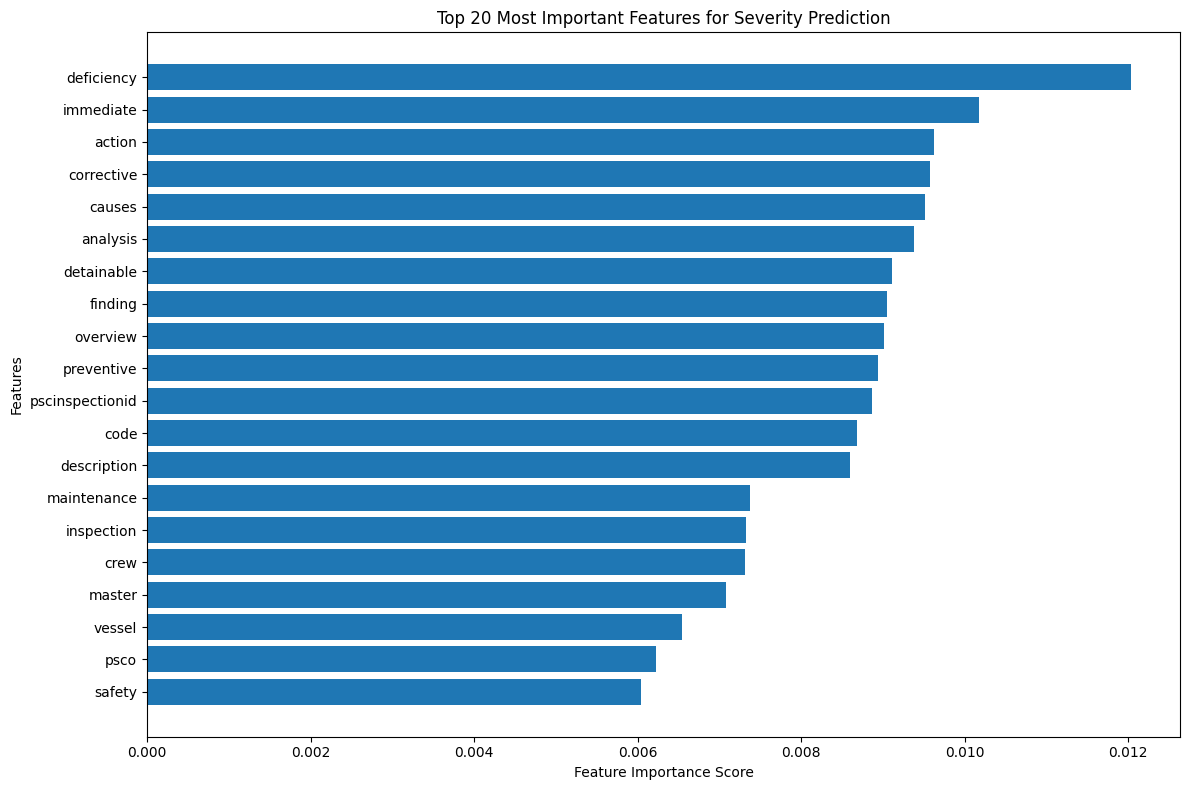


Top 20 Features for Severity Classification:
deficiency: 0.0120
immediate: 0.0102
action: 0.0096
corrective: 0.0096
causes: 0.0095
analysis: 0.0094
detainable: 0.0091
finding: 0.0090
overview: 0.0090
preventive: 0.0089
pscinspectionid: 0.0089
code: 0.0087
description: 0.0086
maintenance: 0.0074
inspection: 0.0073
crew: 0.0073
master: 0.0071
vessel: 0.0065
psco: 0.0062
safety: 0.0060


In [116]:
# Get the top 20 most important features using filtered feature names
feature_importances = pd.DataFrame({
    'Feature': filtered_feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(20)

# Create a more detailed visualization
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Top 20 Most Important Features for Severity Prediction')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at top
plt.tight_layout()
plt.show()

# Print detailed analysis of top features
print("\nTop 20 Features for Severity Classification:")
for idx, row in feature_importances.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

In [121]:
# Get top 20 features
top_20_features = feature_importances.head(20)['Feature'].tolist()

# Create a dictionary to store results
feature_severity_analysis = {}

for feature in top_20_features:
    # Filter for rows where the feature appears in def_text
    mask = df_cleaned['def_text'].str.contains(r'\b' + feature + r'\b', case=False, na=False)
    feature_data = df_cleaned[mask]
    
    if not feature_data.empty:
        # Get severity distribution for this feature
        severity_dist = feature_data['annotation_severity'].value_counts()
        
        # Get the most common severity
        most_common_severity = severity_dist.index[0]
        percentage = (severity_dist[0] / severity_dist.sum()) * 100
        
        feature_severity_analysis[feature] = {
            'most_common_severity': most_common_severity,
            'percentage': percentage,
            'distribution': severity_dist
        }

# Display results
for feature, analysis in feature_severity_analysis.items():
    print(f"\nFeature: {feature}")
    print(f"Most common severity: {analysis['most_common_severity']} ({analysis['percentage']:.1f}%)")
    print("Distribution:")
    print(analysis['distribution'])


#save the distribution of the top 20 features as csv
top_features_df = pd.DataFrame(feature_severity_analysis).T
top_features_df.to_csv('top_features_distribution.csv')


/var/folders/yj/_sykjyks31j7t9pdm3jfl0v00000gn/T/ipykernel_94607/117461948.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (severity_dist[0] / severity_dist.sum()) * 100
/var/folders/yj/_sykjyks31j7t9pdm3jfl0v00000gn/T/ipykernel_94607/117461948.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (severity_dist[0] / severity_dist.sum()) * 100
/var/folders/yj/_sykjyks31j7t9pdm3jfl0v00000gn/T/ipykernel_94607/117461948.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFr

/var/folders/yj/_sykjyks31j7t9pdm3jfl0v00000gn/T/ipykernel_94607/117461948.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (severity_dist[0] / severity_dist.sum()) * 100
/var/folders/yj/_sykjyks31j7t9pdm3jfl0v00000gn/T/ipykernel_94607/117461948.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (severity_dist[0] / severity_dist.sum()) * 100
/var/folders/yj/_sykjyks31j7t9pdm3jfl0v00000gn/T/ipykernel_94607/117461948.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFr


Feature: deficiency
Most common severity: Medium (38.5%)
Distribution:
annotation_severity
Medium              6919
Low                 6859
High                4042
Not a deficiency     150
Name: count, dtype: int64

Feature: immediate
Most common severity: Medium (38.5%)
Distribution:
annotation_severity
Medium              6919
Low                 6859
High                4042
Not a deficiency     150
Name: count, dtype: int64

Feature: action
Most common severity: Medium (38.5%)
Distribution:
annotation_severity
Medium              6919
Low                 6859
High                4042
Not a deficiency     150
Name: count, dtype: int64

Feature: corrective
Most common severity: Medium (38.5%)
Distribution:
annotation_severity
Medium              6919
Low                 6859
High                4042
Not a deficiency     150
Name: count, dtype: int64

Feature: causes
Most common severity: Medium (38.5%)
Distribution:
annotation_severity
Medium              6919
Low                 

/var/folders/yj/_sykjyks31j7t9pdm3jfl0v00000gn/T/ipykernel_94607/117461948.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (severity_dist[0] / severity_dist.sum()) * 100
